In [3]:
from static_visualization import scanpath_visualization, baseline_visualization, saccade_visualization, aoi_visualization, Visualization, get_visualizations
import pandas as pd

In [4]:
data = pd.read_excel('../test_data/itog_fix_1_aoi.xlsx')

pk = ["tekst"]
vis1 = Visualization(x="norm_pos_x", y="norm_pos_y", aoi='AOI', show_legend=True, show_hull=True, only_points=True, aoi_c={'C':'blue', 'N':'green', 'D':'red'}, is_gray=True)
vis2 = Visualization(x="norm_pos_x", y="norm_pos_y", aoi='AOI', show_legend=True, add_regressions=True, regression_color='red', seq_colormap=True, is_vectors=True, points_enumeration=True, rule=(180, ), deviation=(45,), is_gray=True)
res = get_visualizations(data, pk=pk, patterns=[vis2, vis1])

In [5]:
res.shape

(37, 2, 1000, 1000)

In [6]:
data = pd.read_excel('../test_data/itog_fix_1_aoi.xlsx')
data = data[data["tekst"] == 15]

In [7]:
def remove_points(df, x_min, x_max, y_min, y_max):
    df = df[df['norm_pos_x'] <= x_max]
    df = df[df['norm_pos_x'] >= x_min]
    df = df[df['norm_pos_y'] >= y_min]
    df = df[df['norm_pos_y'] <= y_max]
    return df

data = remove_points(data, -1, 1, -1, 1)

## Baseline

In [8]:
baseline_visualization(data, 'norm_pos_x', 'norm_pos_y', return_ndarray=False)

## Visualization of areas of interest

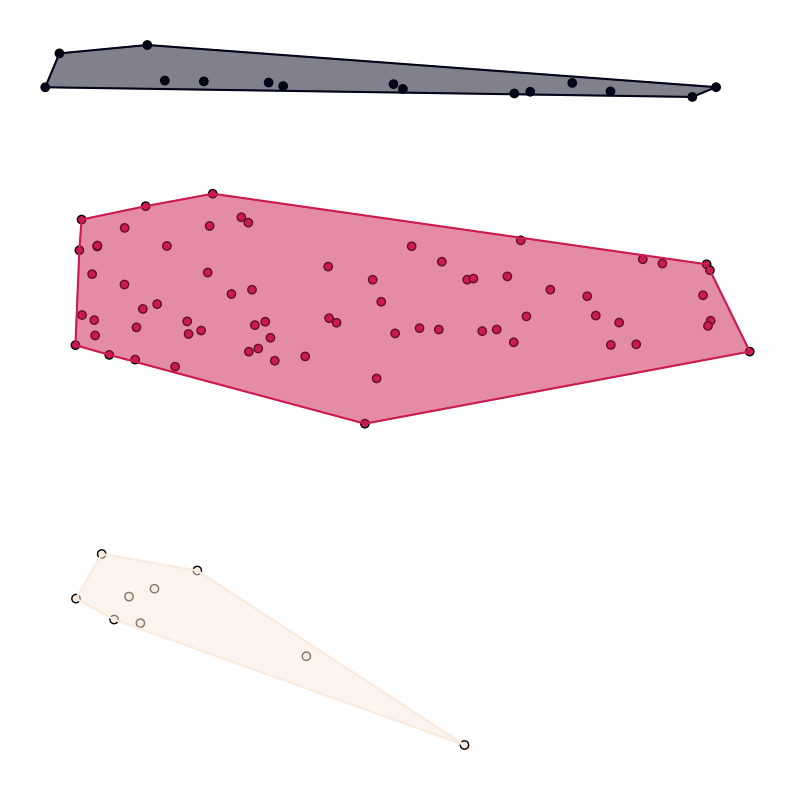

In [9]:
arr = aoi_visualization(data, 'norm_pos_x', 'norm_pos_y', "AOI", return_ndarray=False)

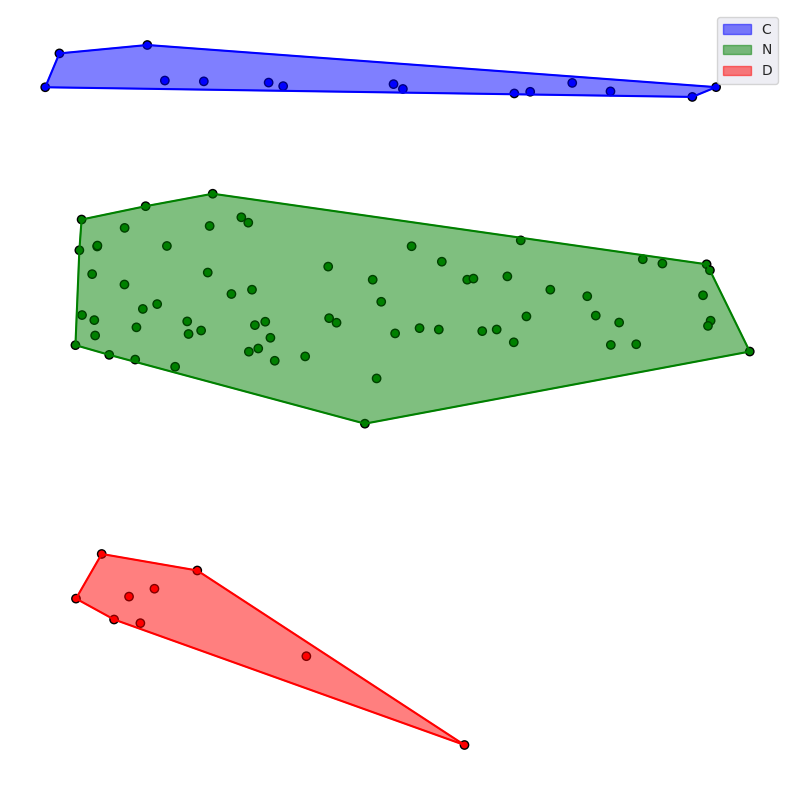

In [10]:
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", aoi='AOI', show_legend=True, show_hull=True, only_points=True, aoi_c={'C':'blue', 'N':'green', 'D':'red'}, return_ndarray=False)

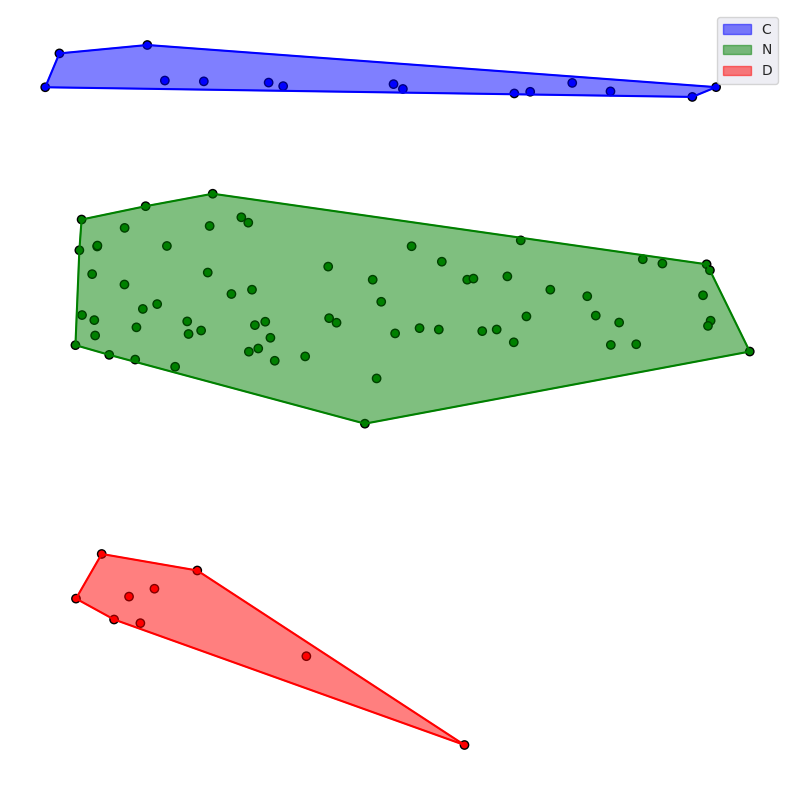

In [11]:
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", aoi='AOI', show_legend=True, show_hull=True, only_points=True, aoi_c={'C':'blue', 'N':'green', 'D':'red'}, return_ndarray=False)

## Visualization of scanpath (enumeration of fixations; green vectors — saccades color; red vectors — regression color; "latest" vectors are darker)

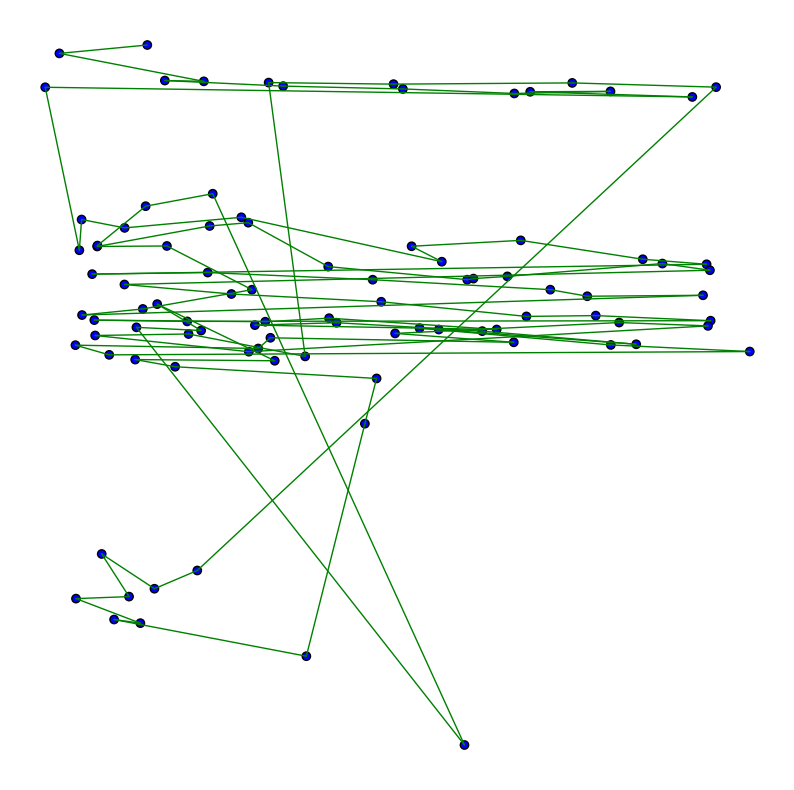

In [12]:
saccade_visualization(data, "norm_pos_x", "norm_pos_y", regression_color="red", return_ndarray=False)

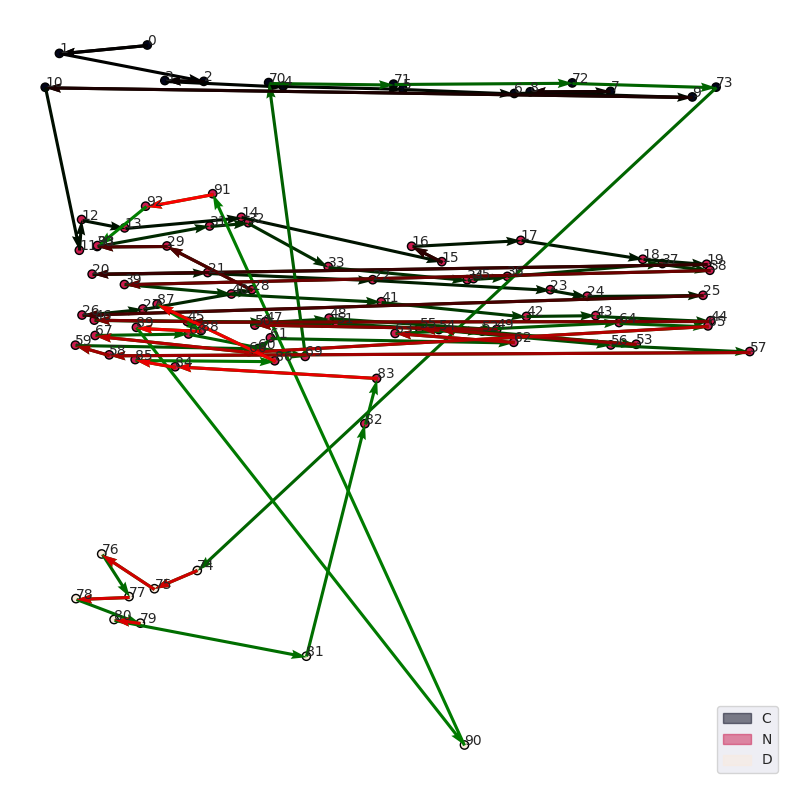

In [13]:
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", time_stamps="start_timestamp", aoi='AOI', show_legend=True, add_regressions=True, regression_color='red', seq_colormap=True, is_vectors=True, points_enumeration=True, rule=(180, ), deviation=(45,), return_ndarray=False)

## Visualization of fixations (enumerated; the shape of the fixations depends on the duration; the color of the areas of interest has been changed)

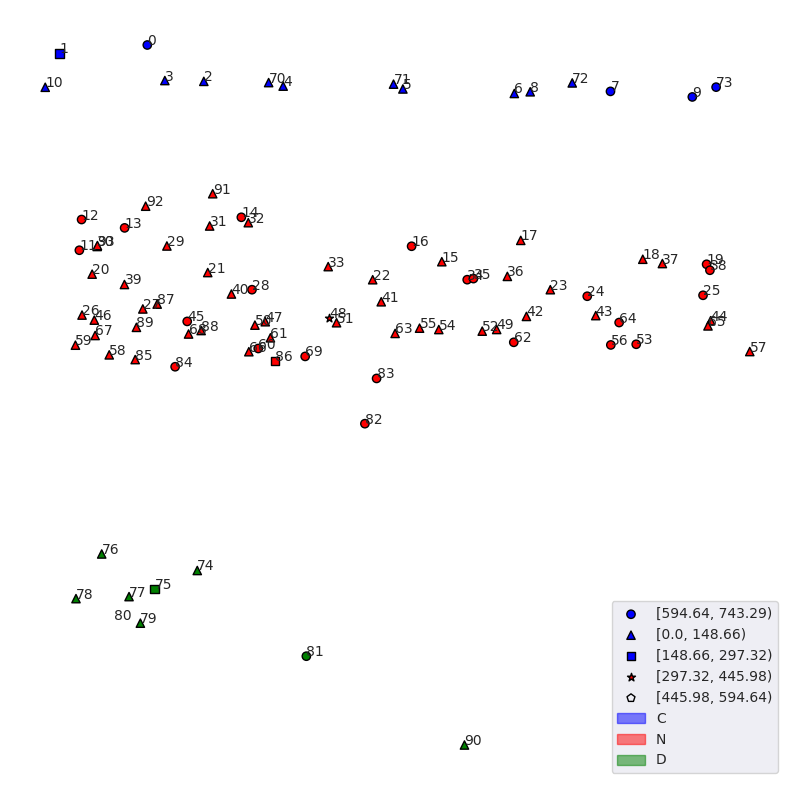

In [14]:
aoi_color = dict()
aoi_color['C'] = 'blue'
aoi_color['N'] = 'red'
aoi_color['D'] = 'green'
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", shape_column="duration", aoi='AOI', show_legend=True, points_enumeration=True, only_points=True, aoi_c=aoi_color, return_ndarray=False)